In [1]:
import sys
# !{sys.executable} -m pip install seaborn
from Element_PI import PersDiagram, dgms,ripser_f,Makexyzdistance
from Element_PI import VariancePersist3 as VP
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from persim import plot_diagrams
from ase.visualize.plot import plot_atoms
from ase.io import read, write
from ase import Atoms

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [2]:
def plot_PD_PI(file):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    PersDiagram(file,lifetime=True)
    plt.legend(loc=2)
    plt.subplot(122)
    VP(file,pixelx=50, pixely=50, myspread=2, myspecs={"maxBD": 2, "minBD":0})
    plt.tight_layout()
    plt.show()

In [3]:
test_ase=read('2-benzyloxirane.xyz',format='xyz')

In [4]:
import ase.visualize.plot as aseplot

In [5]:
test_ase.get_distance(0,1)

1.5115265508088174

In [6]:
dictase=test_ase.todict()
pos=dictase['positions']
lbs=dictase['numbers']

In [7]:
lbs

array([6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
from mpl_toolkits.mplot3d import Axes3D
list_center = pos
list_lbs = lbs
def plt_sphere(list_center, radius,list_lbs):
    fig = plt.figure(figsize=(4,2))
    
    r = radius

plt_sphere(list_center, 1e-1,list_lbs) 
plt_sphere(list_center, 1,list_lbs) 
plt_sphere(list_center, 2,list_lbs) 
plt_sphere(list_center, 3,list_lbs) 

<Figure size 400x200 with 0 Axes>

<Figure size 400x200 with 0 Axes>

<Figure size 400x200 with 0 Axes>

<Figure size 400x200 with 0 Axes>

In [9]:
[i for i in dir(test_ase) if 'set' in i],[i for i in dir(test_ase) if 'get' in i]

(['__setattr__',
  '_set_positions',
  'set_angle',
  'set_array',
  'set_atomic_numbers',
  'set_calculator',
  'set_cell',
  'set_celldisp',
  'set_center_of_mass',
  'set_chemical_symbols',
  'set_constraint',
  'set_dihedral',
  'set_distance',
  'set_initial_charges',
  'set_initial_magnetic_moments',
  'set_masses',
  'set_momenta',
  'set_pbc',
  'set_positions',
  'set_scaled_positions',
  'set_tags',
  'set_velocities'],
 ['__getattribute__',
  '__getitem__',
  '_get_atomic_numbers',
  '_get_constraints',
  '_get_positions',
  'get_all_distances',
  'get_angle',
  'get_angles',
  'get_angular_momentum',
  'get_array',
  'get_atomic_numbers',
  'get_calculator',
  'get_cell',
  'get_cell_lengths_and_angles',
  'get_celldisp',
  'get_center_of_mass',
  'get_charges',
  'get_chemical_formula',
  'get_chemical_symbols',
  'get_dihedral',
  'get_dihedrals',
  'get_dipole_moment',
  'get_distance',
  'get_distances',
  'get_forces',
  'get_global_number_of_atoms',
  'get_initial_cha

In [10]:
# test_ase.symbols='X'
# test_ase.set_atomic_numbers = 16

In [11]:
test_ase.set_masses(np.ones(len(test_ase))+1)
test_ase.get_masses()

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [12]:

# plot_atoms(test_ase,radii=len(test_ase)*[3])
# # plot_atoms(test_ase)
# plt.ylim(-10,20)
# plt.xlim(-10,20)
# plt.grid(False)
# plt.axis(False)

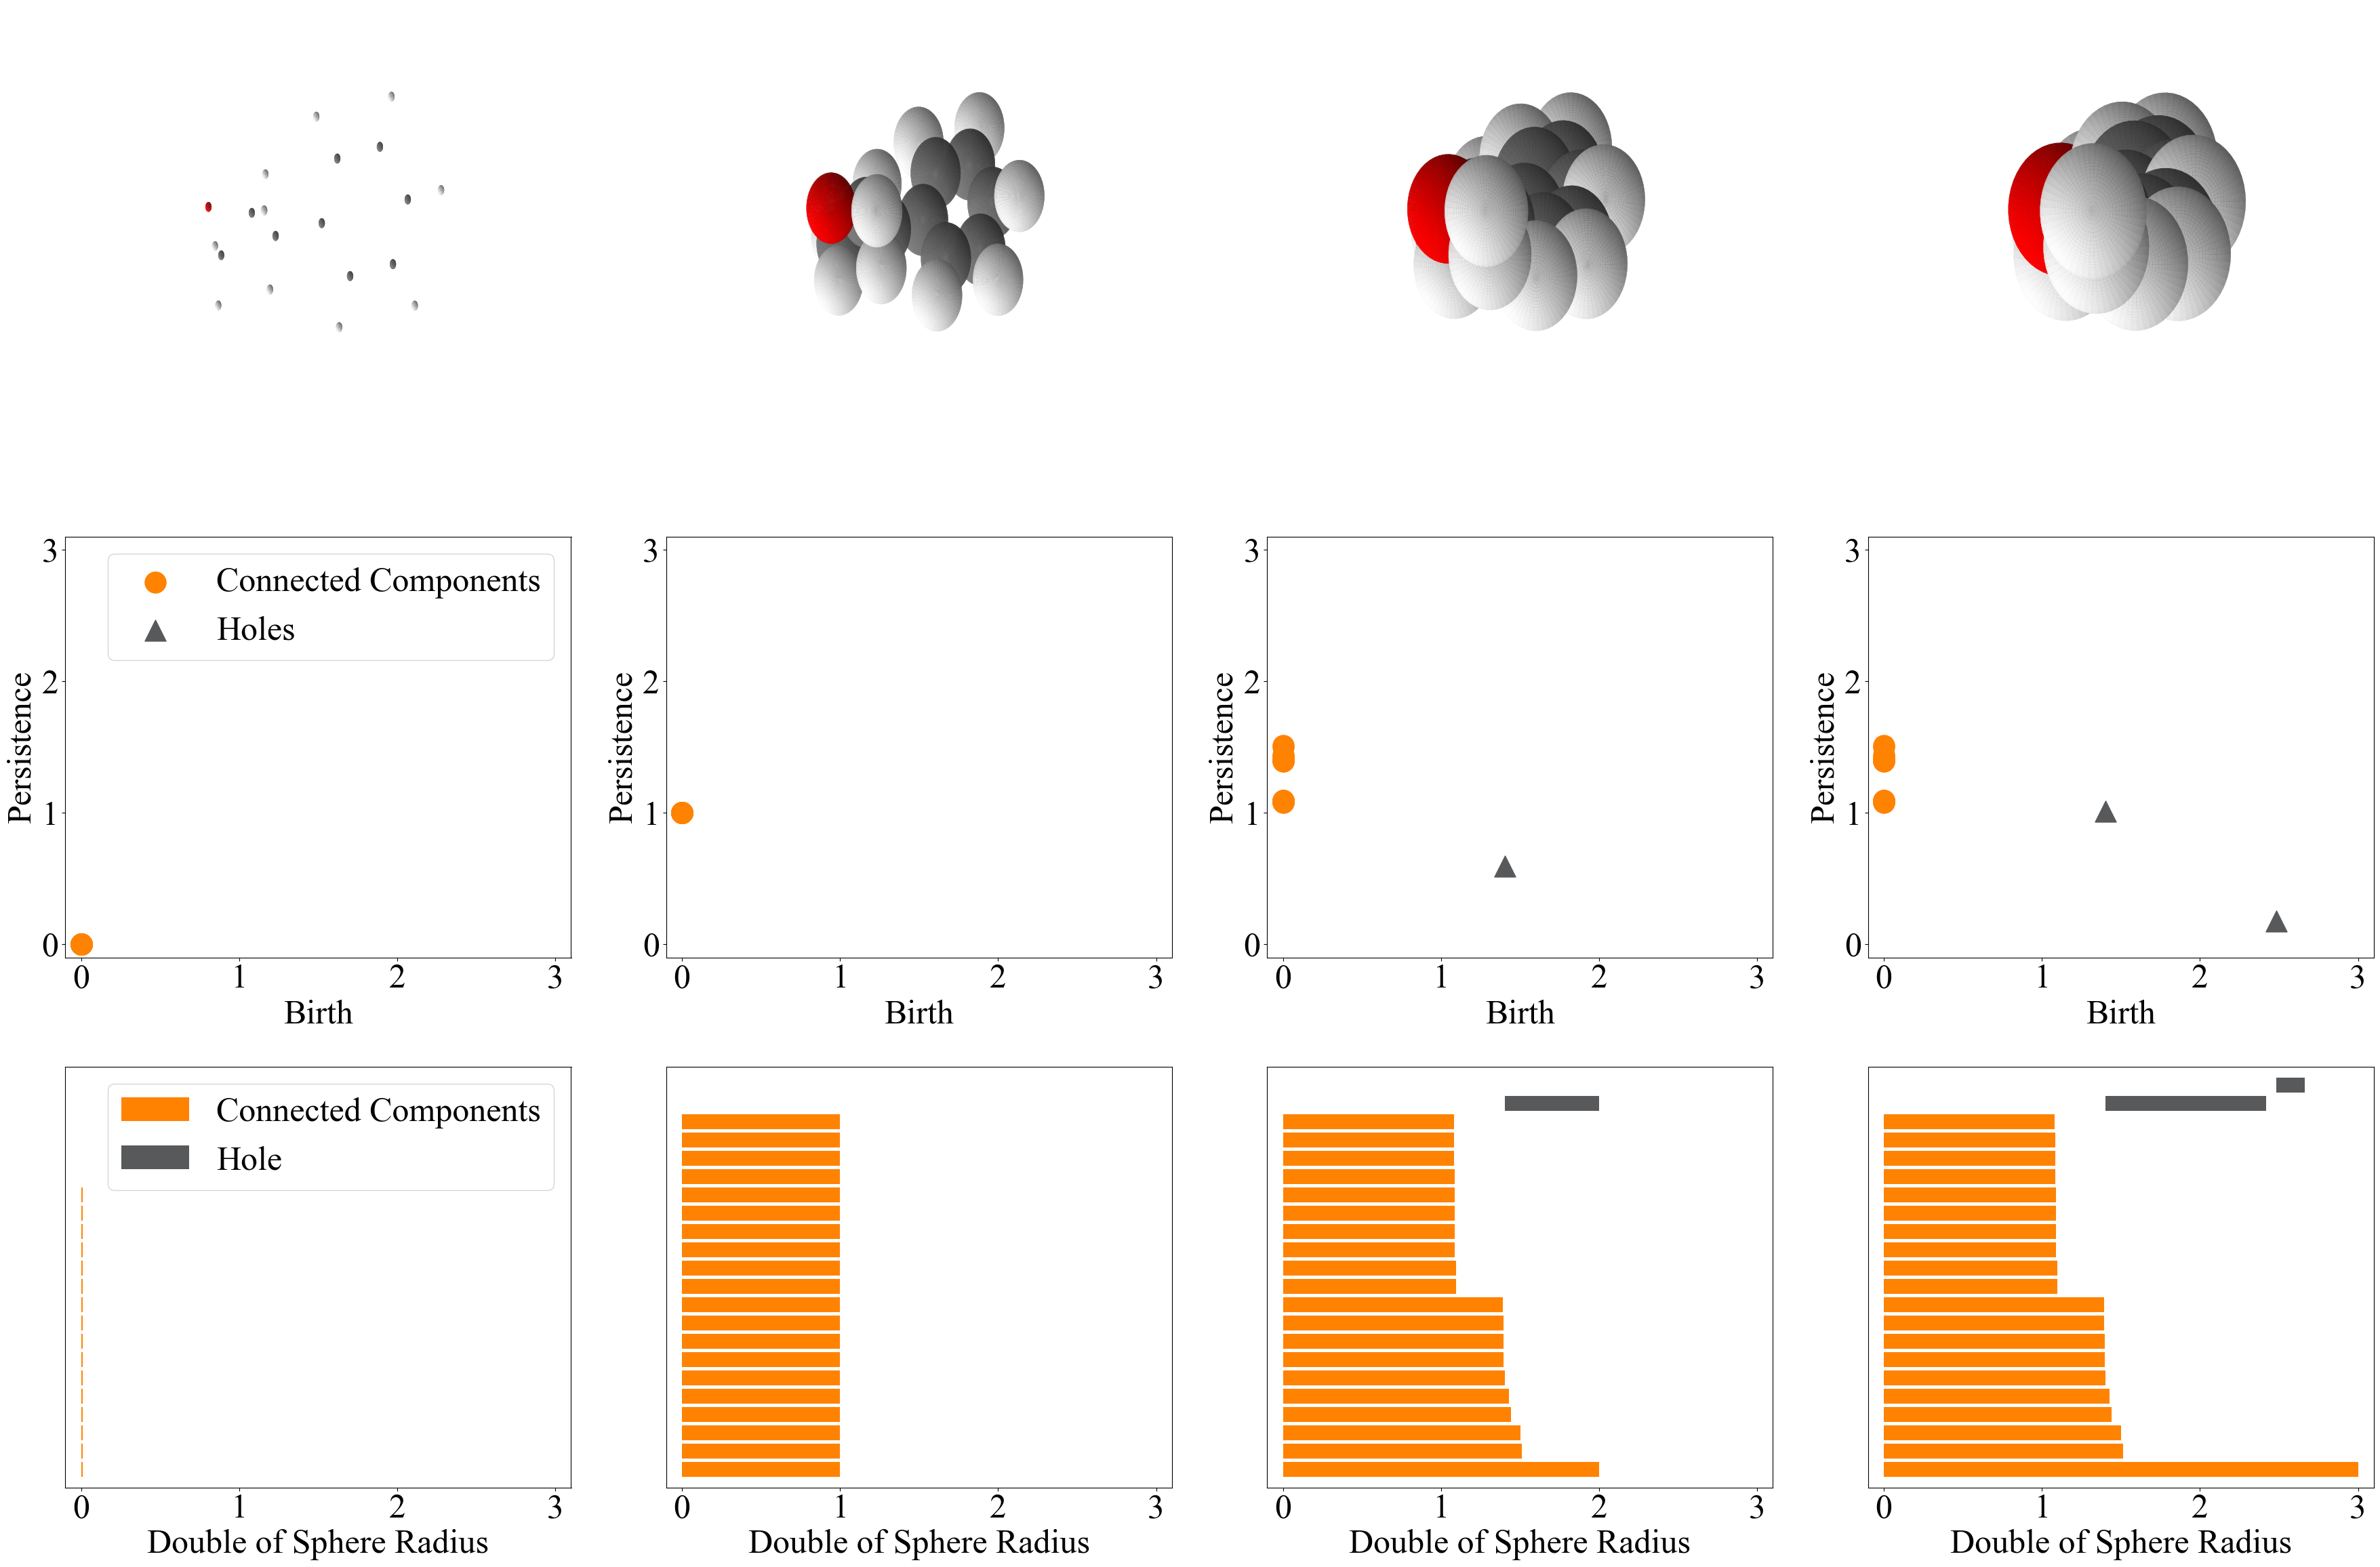

In [13]:
fig=plt.figure(figsize=(36, 24))
plt.rcParams.update({'font.size': 36,'font.family':'Times New Roman'})
test_file='2-benzyloxirane.xyz'
radmax=4
for i in range(radmax):
    thresh=i
    r=ripser_f(test_file,thresh=thresh)
    con_components = np.flip(r['dgms'][0],axis=0)
    con_components[con_components == np.inf] = thresh
    holes = np.flip(r['dgms'][1],axis=0)
    holes[holes == np.inf] = thresh
    len_components = len(con_components)
    len_holes = len(holes)
    hole_idx=list(map(lambda x:x+len_components, range(len_holes)))
    components_idx=range(len_components)


    ax=fig.add_subplot(3,4,i+1,projection='3d')
    
    if i==0:
        rad=1e-1
    else:
        rad=i
    for lbl,c in zip(list_lbs,list_center):
        if lbl==6:
            colors='gray'
        if lbl==8:
            colors='red'
        if lbl==1:
            colors='white'
            
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        x = rad*np.cos(u)*np.sin(v)
        y = rad*np.sin(u)*np.sin(v)
        z = rad*np.cos(v)

        ax.plot_surface(x-c[0], y-c[1], z-c[2],color=colors,rstride=1, cstride=1, alpha=None, antialiased=True)
    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(90, -90, 0)
    plt.tight_layout()
    
    


    fig.add_subplot(3,4,radmax+i+1)
    clean_components = r['dgms'][0][:-1]
    persistence_cc = clean_components[:,1]-clean_components[:,0]
    clean_holes = r['dgms'][1]
    persistence_holes = clean_holes[:,1] - clean_holes[:,0]
    plt.scatter(clean_components[:,0],persistence_cc,label='Connected Components',color='#FF8200',s=500)
    plt.scatter(clean_holes[:,0],persistence_holes,label='Holes',marker='^',color='#58595B',s=500)
    # plt.hlines(i,-5,5,color='red',label=f'Radius={i}')
    if i==0:
        plt.legend(loc=1)
    plt.xlim(-1e-1,3+1e-1)
    plt.ylim(-1e-1,3+1e-1)
    plt.ylabel('Persistence')
    plt.xlabel('Birth')
    
    

    fig.add_subplot(3,4,2*radmax+i+1)
    
    if i==0:
        plt.barh(range(16),np.zeros(16)+1e-2,label='Connected Components',color='#FF8200')
        plt.barh(np.NaN,np.NaN,left=np.NaN,label='Hole',color='#58595B')
        plt.legend(loc=1)
        
    else:
        plt.barh(hole_idx,holes[:,1]-holes[:,0],left=holes[:,0],label='Hole',color='#58595B')
        plt.barh(components_idx,con_components[:,1]-con_components[:,0],label='Connected Components',color='#FF8200')
    plt.xlabel('Double of Sphere Radius')
    plt.yticks([])
    plt.ylim(-1,max(components_idx)+3)
    plt.xlim(-1e-1,3+1e-1)
plt.savefig('2-benzyloxiranefig.png',dpi=300)    
plt.show()

In [14]:

# for i in range(4):
#     fig, ax = plt.subplots(figsize=(4,4))
#     for lbl,xyz in list(zip(dictase['numbers'],dictase['positions'])):
#         if lbl==6:
#             ax.add_patch(plt.Circle((xyz[0],  xyz[1]),i,facecolor='grey',linewidth=1,edgecolor='black'))
#         if lbl==1:
#             ax.add_patch(plt.Circle((xyz[0],  xyz[1]),i,facecolor='white',linewidth=1,edgecolor='black'))        
#         if lbl==8:
#             ax.add_patch(plt.Circle((xyz[0],  xyz[1]),i,facecolor='red',linewidth=1,edgecolor='black'))        
#     plt.xlim(-10,10)
#     plt.ylim(-10,10)
#     plt.show()

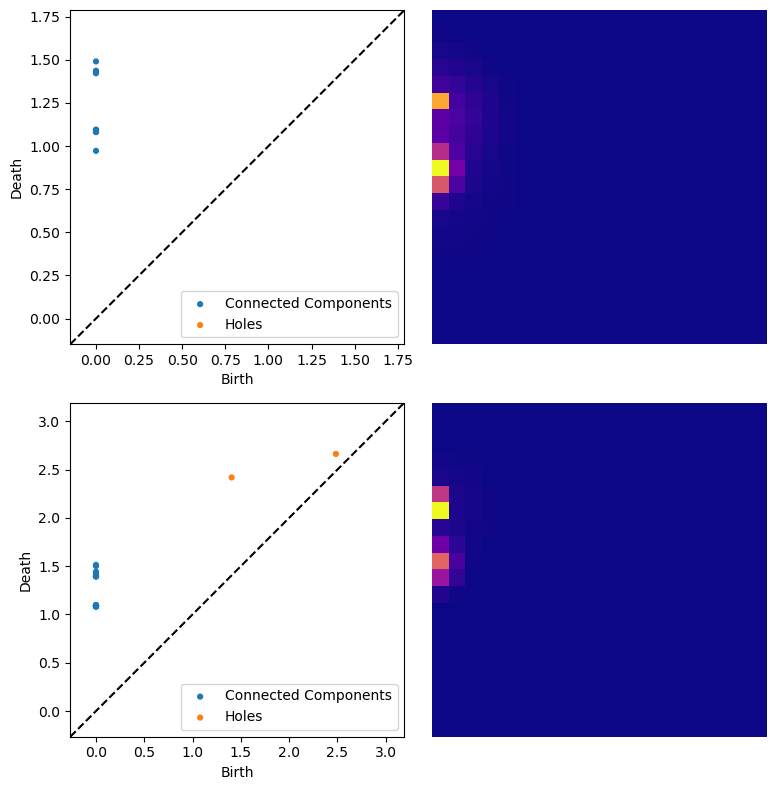

In [18]:

test_file1='glycidol.xyz'
test_file2='2-benzyloxirane.xyz'
plt.figure(figsize=(8, 8))
# plt.rcParams.update({'font.size': 16,'font.family':'Times New Roman'})
plt.subplot(221)
PersDiagram(test_file1,lifetime=False)
plt.legend(loc=4)
plt.subplot(222)
VP(test_file1,pixelx=20, pixely=20, myspread=2, myspecs={"maxBD": 2, "minBD":0},showplot=False)

plt.subplot(223)
PersDiagram(test_file2,lifetime=False)
plt.legend(loc=4)
plt.subplot(224)
VP(test_file2,pixelx=20, pixely=20, myspread=2, myspecs={"maxBD": 2, "minBD":0},showplot=False)

plt.tight_layout()
plt.savefig('PD_PI_stacked.png',dpi=300)
plt.show()

In [16]:
# import gudhi
# pt_cloud = Makexyzdistance('2-benzyloxirane.xyz')[0]
# #Use GUDHI to generate the corresponding Rips complex,
# rips_complex = gudhi.RipsComplex(points=pt_cloud, max_edge_length=20)
# # simplex tree,
# simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
# # and persistence data from the point cloud
# diag = simplex_tree.persistence(min_persistence=0.4)
# # Generate the persistence barcode.
# pb = gudhi.plot_persistence_barcode(diag, max_intervals=0,alpha=1.0,legend=True)
# plt.xlim(0,20)
# plt.show()
# # Generate the persistence diagram.
# pd = gudhi.plot_persistence_diagram(diag, max_intervals=0,alpha=1.0,legend=True)
# # Plot the barcode and diagram
# plt.show()
